In [1]:
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing.image import load_img
from keras.models import Sequential
import os
import pandas as pd
import numpy as np

In [2]:
TRAIN_DIR = 'images/train'
TEST_DIR = 'images/validation'

In [3]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths,labels

In [4]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

happy completed
sad completed
fear completed
surprise completed
neutral completed
angry completed
disgust completed


In [5]:
print(train)

                                image    label
0         images/train/happy/3578.jpg    happy
1        images/train/happy/16988.jpg    happy
2         images/train/happy/2666.jpg    happy
3         images/train/happy/5109.jpg    happy
4        images/train/happy/11981.jpg    happy
...                               ...      ...
28816  images/train/disgust/10112.jpg  disgust
28817  images/train/disgust/21668.jpg  disgust
28818   images/train/disgust/7049.jpg  disgust
28819   images/train/disgust/9716.jpg  disgust
28820   images/train/disgust/3561.jpg  disgust

[28821 rows x 2 columns]


In [6]:
validation = pd.DataFrame()
validation['image'], validation['label'] = createdataframe(TEST_DIR)

happy completed
sad completed
fear completed
surprise completed
neutral completed
angry completed
disgust completed


In [7]:
print(validation)
print(validation['image'])

                                    image    label
0       images/validation/happy/23933.jpg    happy
1       images/validation/happy/24906.jpg    happy
2       images/validation/happy/18033.jpg    happy
3       images/validation/happy/15271.jpg    happy
4       images/validation/happy/26888.jpg    happy
...                                   ...      ...
7061  images/validation/disgust/20761.jpg  disgust
7062  images/validation/disgust/28710.jpg  disgust
7063  images/validation/disgust/23876.jpg  disgust
7064   images/validation/disgust/9460.jpg  disgust
7065  images/validation/disgust/35580.jpg  disgust

[7066 rows x 2 columns]
0         images/validation/happy/23933.jpg
1         images/validation/happy/24906.jpg
2         images/validation/happy/18033.jpg
3         images/validation/happy/15271.jpg
4         images/validation/happy/26888.jpg
                       ...                 
7061    images/validation/disgust/20761.jpg
7062    images/validation/disgust/28710.jpg
7063    ima

In [8]:
from tqdm.notebook import tqdm

In [9]:
!pip install Pillow


[notice] A new release of pip available: 22.2.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [10]:
from keras.preprocessing.image import load_img
import numpy as np
from tqdm.notebook import tqdm

def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, color_mode='grayscale')  # ← this now works
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features), 48, 48, 1)
    return features

In [11]:
import sys
print(sys.executable)

/Users/susmoynath/.pyenv/versions/3.10.7/bin/python3.10


In [12]:
!pip install Pillow


[notice] A new release of pip available: 22.2.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [13]:
from keras.preprocessing.image import load_img
img = load_img('images/train/happy/3578.jpg', color_mode='grayscale')
img.show()  # Optional: opens the image if you're in a GUI environment


In [14]:
from keras.preprocessing.image import load_img
import numpy as np
from tqdm.notebook import tqdm

def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, color_mode='grayscale', target_size=(48, 48))
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features), 48, 48, 1)
    return features


In [15]:
train_features = extract_features(train['image'])

  0%|          | 0/28821 [00:00<?, ?it/s]

In [16]:
validation_features = extract_features(validation['image'])

  0%|          | 0/7066 [00:00<?, ?it/s]

In [21]:
x_train = train_features/255.0
x_validation = validation_features/255.0

In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [24]:
y_train = le.transform(train['label'])
y_validation = le.transform(validation['label'])

In [25]:
y_train = to_categorical(y_train,num_classes = 7)
y_validation = to_categorical(y_validation,num_classes = 7)

In [28]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(7, activation='softmax'))

In [31]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [32]:
model.fit(x= x_train,y = y_train, batch_size = 128, epochs = 100, validation_data = (x_validation,y_validation)) 

Epoch 1/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 449s 2s/step - accuracy: 0.2338 - loss: 1.8363 - val_accuracy: 0.2583 - val_loss: 1.8144
Epoch 2/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 466s 2s/step - accuracy: 0.2480 - loss: 1.8140 - val_accuracy: 0.2642 - val_loss: 1.7840
Epoch 3/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 491s 2s/step - accuracy: 0.2777 - loss: 1.7525 - val_accuracy: 0.3520 - val_loss: 1.6471
Epoch 4/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 462s 2s/step - accuracy: 0.3346 - loss: 1.6592 - val_accuracy: 0.4172 - val_loss: 1.5125
Epoch 5/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 476s 2s/step - accuracy: 0.3975 - loss: 1.5448 - val_accuracy: 0.4508 - val_loss: 1.3920
Epoch 6/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 476s 2s/step - accuracy: 0.4310 - loss: 1.4601 - val_accuracy: 0.4914 - val_loss: 1.3256
Epoch 7/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 436s 2s/step - accuracy: 0.4534 - loss: 1.4075 - val_accuracy: 0.4994 - val_loss: 1.2917
Epoch 8/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 375s 2s/step - accuracy: 0.4660 - loss: 1.3820 - 

In [48]:
model_json = model.to_json()
with open("emotiondetector.json",'w') as json_file:
    json_file.write(model_json)
model.save("emotiondetector.h5")

In [49]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [55]:
from keras.utils import load_img, img_to_array
import numpy as np

def ef(image):
    img = load_img(image, color_mode='grayscale', target_size=(48, 48))
    feature = img_to_array(img)
    feature = feature.reshape(1, 48, 48, 1)
    return feature / 255.0


In [56]:
image = 'images/train/sad/42.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)

original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
model prediction is  sad


In [57]:
!pip install matplotlib


[notice] A new release of pip available: 22.2.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
model prediction is  sad


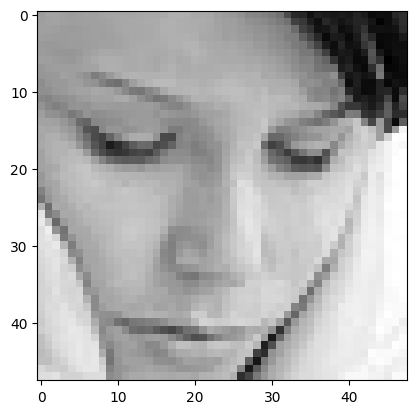

In [58]:
image = 'images/train/sad/42.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of disgust
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
model prediction is  disgust


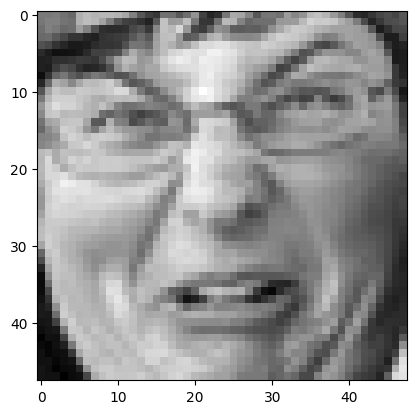

In [59]:
image = 'images/train/disgust/299.jpg'
print("original image is of disgust")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of happy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
model prediction is  happy


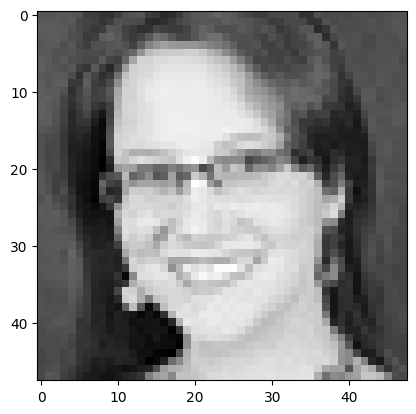

In [60]:
image = 'images/train/happy/7.jpg'
print("original image is of happy")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of surprise
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
model prediction is  surprise


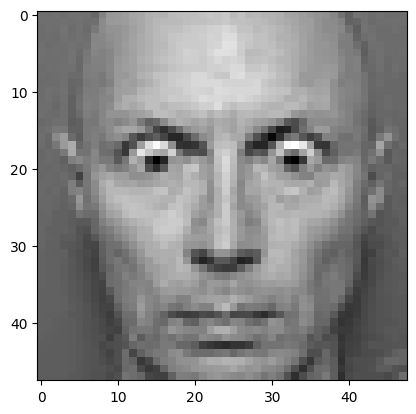

In [61]:
image = 'images/train/surprise/15.jpg'
print("original image is of surprise")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')